# Lab Session \# 04


---


by Josué Obregón <br>
BDA712-00 - Machine Learning Programming <br>
Department of Big Data Analytics - Kyung Hee University<br>

## Objective

The objective of this session is to improve our previous linear regression implementation by tweaking our training function with the gradient descent algorithm. 

Additionally we will implement multiple linear regression using more than one predictor.


# Getting the data

In [1]:
import gdown

In [2]:
!mkdir data

In [3]:
urls = ['https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G', # pizza.txt  https://drive.google.com/file/d/1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G/view?usp=sharing       
        'https://drive.google.com/uc?export=download&id=1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP', # pizza_2_vars.txt  https://drive.google.com/file/d/1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP/view?usp=sharing      
        'https://drive.google.com/uc?export=download&id=12mp_1uPGEIyW334Znp33RIPHoirFNrYe', # pizza_3_vars.txt  https://drive.google.com/file/d/12mp_1uPGEIyW334Znp33RIPHoirFNrYe/view?usp=sharing       
      ]
outputs = ['pizza.txt','pizza_2_vars.txt','pizza_3_vars.txt']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Hqv36-YZKOMJwoAy__LERnrC9mzFNT6G
To: /content/data/pizza.txt
100%|██████████| 232/232 [00:00<00:00, 261kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1t0fujnd3LfoAMBE9JUIOjBusn02Q4WqP
To: /content/data/pizza_2_vars.txt
100%|██████████| 360/360 [00:00<00:00, 677kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=12mp_1uPGEIyW334Znp33RIPHoirFNrYe
To: /content/data/pizza_3_vars.txt
100%|██████████| 468/468 [00:00<00:00, 794kB/s]


# Preliminaries

Let's import the data and prepare the variables that we will need for our laboratory

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = np.genfromtxt('data/pizza.txt', delimiter=',', skip_header=1)
X, Y = data[:,0], data[:,1]
print(X.shape)
print(Y.shape)

(30,)
(30,)


Let's define our previous functions

In [6]:
def predict(X, w, b):
  return X * w + b

def loss(X, Y, w, b):
  return np.average((predict(X, w, b) - Y) ** 2)

def train_old(X, Y, iterations, lr):
  w = 0
  b = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w, b)
    print(f'Iteration {i} => Loss (MSE): {current_loss:.6f}')
    if loss(X, Y, w + lr, b) < current_loss:
      w += lr
    elif loss(X, Y, w - lr, b) < current_loss:
      w -= lr
    elif loss(X, Y, w, b + lr) < current_loss:
      b += lr
    elif loss(X, Y, w, b - lr) < current_loss:
      b -= lr
    else:
      print(f'Best w: {w}, Best b: {b}')
      return w, b
  print(f'Best w: {w}, Best b: {b}')
  raise Exception(f'Couldn\'t converge within {iterations} iterations')

Alright, let's get right into business!

# Gradient descent

---
Remember that the mean squared error loss function is defined by:

$L=\frac{1}{m} \sum_{i=1}^{m} (wx_i + b - y_i)^2$

and getting the partial derivatives of L with respect to $w$ and $b$ gives us:

* $\frac{\partial{L}}{\partial{w}}=\frac{2}{m} \sum_{i=1}^{m} x_i(wx_i + b - y_i)$

* $\frac{\partial{L}}{\partial{b}}=\frac{2}{m} \sum_{i=1}^{m} (wx_i + b - y_i)$

So now let's code the gradient function:

In [39]:
def gradient(X, Y, w, b):
  w_gradient = 2*np.mean(X*(predict(X, w, b)-Y))
  b_gradient = 2*np.mean((predict(X, w, b)-Y))
  return w_gradient, b_gradient

And our train function 

In [40]:
def train(X, Y, iterations, lr):
  w = 0
  b = 0
  for i in range(iterations):
    print(f'Iteration {i} => Loss(MSE){loss(X,Y,w,b):.6f}')
    w_gradient, b_gradient = gradient(X, Y, w, b)
    w -= w_gradient * lr
    b -= b_gradient * lr
  return w,b

Let's try our new function. Play around a bit and let's share our results

In [51]:
w, b = train(X, Y, iterations = 1000, lr = 0.004)

Iteration 0 => Loss(MSE)812.866667
Iteration 1 => Loss(MSE)493.993432
Iteration 2 => Loss(MSE)311.532038
Iteration 3 => Loss(MSE)207.091688
Iteration 4 => Loss(MSE)147.275786
Iteration 5 => Loss(MSE)112.983164
Iteration 6 => Loss(MSE)93.288914
Iteration 7 => Loss(MSE)81.944541
Iteration 8 => Loss(MSE)75.376216
Iteration 9 => Loss(MSE)71.539889
Iteration 10 => Loss(MSE)69.266466
Iteration 11 => Loss(MSE)67.887282
Iteration 12 => Loss(MSE)67.019892
Iteration 13 => Loss(MSE)66.445556
Iteration 14 => Loss(MSE)66.039166
Iteration 15 => Loss(MSE)65.729162
Iteration 16 => Loss(MSE)65.474617
Iteration 17 => Loss(MSE)65.252118
Iteration 18 => Loss(MSE)65.048276
Iteration 19 => Loss(MSE)64.855430
Iteration 20 => Loss(MSE)64.669196
Iteration 21 => Loss(MSE)64.487068
Iteration 22 => Loss(MSE)64.307609
Iteration 23 => Loss(MSE)64.129996
Iteration 24 => Loss(MSE)63.953758
Iteration 25 => Loss(MSE)63.778623
Iteration 26 => Loss(MSE)63.604435
Iteration 27 => Loss(MSE)63.431103
Iteration 28 => Loss(MSE

Let's check the best result

In [27]:
x_new = 20
print()

(30,)

In [28]:
X.shape

(30,)

In [52]:
Y.shape

(30,)

In [56]:
%%time
train_old(X, Y, iterations = 10000, lr = 0.004)

Iteration 0 => Loss (MSE): 812.866667
Iteration 1 => Loss (MSE): 809.642967
Iteration 2 => Loss (MSE): 806.426270
Iteration 3 => Loss (MSE): 803.216574
Iteration 4 => Loss (MSE): 800.013879
Iteration 5 => Loss (MSE): 796.818187
Iteration 6 => Loss (MSE): 793.629495
Iteration 7 => Loss (MSE): 790.447806
Iteration 8 => Loss (MSE): 787.273118
Iteration 9 => Loss (MSE): 784.105431
Iteration 10 => Loss (MSE): 780.944747
Iteration 11 => Loss (MSE): 777.791063
Iteration 12 => Loss (MSE): 774.644382
Iteration 13 => Loss (MSE): 771.504702
Iteration 14 => Loss (MSE): 768.372023
Iteration 15 => Loss (MSE): 765.246347
Iteration 16 => Loss (MSE): 762.127671
Iteration 17 => Loss (MSE): 759.015998
Iteration 18 => Loss (MSE): 755.911326
Iteration 19 => Loss (MSE): 752.813655
Iteration 20 => Loss (MSE): 749.722987
Iteration 21 => Loss (MSE): 746.639319
Iteration 22 => Loss (MSE): 743.562654
Iteration 23 => Loss (MSE): 740.492990
Iteration 24 => Loss (MSE): 737.430327
Iteration 25 => Loss (MSE): 734.374

(1.0880000000000007, 13.083999999999003)

Let's plot the line

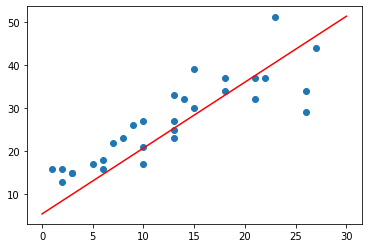

In [77]:
x_line = np.linspace(0, 30, 100)
y_line = w*x_line+b

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line, y_line, 'r')
plt.show()

## Visualizing training history

Let's improve our train functino with two more functionalities:

* First, we will add a stop criterion. With GD, the loss could in theory decrease forever, inching toward the minimum in smaller and smaller steps, without ever quite reaching it. So, when should we stop making
those ever-tinier steps?
  * We could decide to stop when the gradient becomes small enough. We will use a paramter name precision for this
* We will also return the training history, including values of w, b and loss at each step

Let's do it!

In [71]:
def train_with_history(X, Y, iterations, lr=0.001, precision=1e-6, initial_w=0, initial_b=0):
  w = initial_w
  b = initial_b

  previous_loss = loss(X, Y, w, b)
  history = [[w, b, previous_loss]]

  for i in range(iterations):
    print(f'Iteration {i} => Loss(MSE){loss(X,Y,w,b):.6f}')
    w_gradient, b_gradient = gradient(X, Y, w, b)
    w -= w_gradient * lr
    b -= b_gradient * lr

    current_loss = loss(X, Y, w, b)
    history.append([w, b, current_loss])
    if (abs(current_loss - previous_loss)) < precision:
      return w, b, history

    previous_loss = current_loss

  print(f'Couldn converge within {iterations} iterations. Last w: {w}, b:{b}')
  return w,b,history

In [72]:
w, b, history = train_with_history(X, Y, 1000)

Iteration 0 => Loss(MSE)812.866667
Iteration 1 => Loss(MSE)302.576956
Iteration 2 => Loss(MSE)141.984090
Iteration 3 => Loss(MSE)91.421377
Iteration 4 => Loss(MSE)75.479058
Iteration 5 => Loss(MSE)70.429883
Iteration 6 => Loss(MSE)68.808210
Iteration 7 => Loss(MSE)68.265016
Iteration 8 => Loss(MSE)68.061193
Iteration 9 => Loss(MSE)67.964188
Iteration 10 => Loss(MSE)67.900826
Iteration 11 => Loss(MSE)67.848085
Iteration 12 => Loss(MSE)67.798721
Iteration 13 => Loss(MSE)67.750454
Iteration 14 => Loss(MSE)67.702567
Iteration 15 => Loss(MSE)67.654834
Iteration 16 => Loss(MSE)67.607185
Iteration 17 => Loss(MSE)67.559597
Iteration 18 => Loss(MSE)67.512062
Iteration 19 => Loss(MSE)67.464579
Iteration 20 => Loss(MSE)67.417147
Iteration 21 => Loss(MSE)67.369765
Iteration 22 => Loss(MSE)67.322434
Iteration 23 => Loss(MSE)67.275153
Iteration 24 => Loss(MSE)67.227922
Iteration 25 => Loss(MSE)67.180742
Iteration 26 => Loss(MSE)67.133611
Iteration 27 => Loss(MSE)67.086531
Iteration 28 => Loss(MSE)67

Now let's plot our first learning curve!
  It is just a simple curve to visualize how the loss behaves at each iteration

In [74]:
history = np.array(history)
history_w = history[:, 0]
history_b = history[:, 1]
history_loss = history[:, 2]

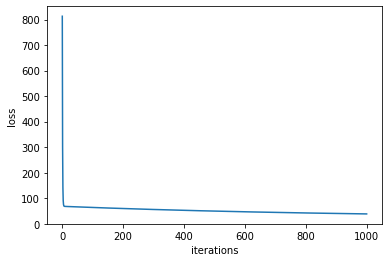

In [76]:
start_iteration = 0
x_iteration = range(start_iteration, history.shape[0])

plt.figure()
plt.plot(x_iteration, history_loss[start_iteration:], 'tab:blue')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

Finally, we will check the following code. 
It is a quick visualization program to plot the algorithm’s path, from an arbitrary starting point to the minimum loss. We just learned an intuitive understanding of gradient descent , but nothing beats watching it in motion as  shown in the graph on page 42 of the book.

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Prepare matrices for 3D plot (W, B and L for weights, biases and losses)
MESH_SIZE = 20
weights = np.linspace(np.min(history_w) - 10, np.max(history_w) + 10,
                      MESH_SIZE)
biases = np.linspace(np.min(history_b) - 100, np.max(history_b) + 100,
                     MESH_SIZE)
W, B = np.meshgrid(weights, biases)
losses = np.array([loss(X, Y, w, b) for w, b in zip(np.ravel(W), np.ravel(B))])
L = losses.reshape((MESH_SIZE, MESH_SIZE))
print(L.shape)

In [ ]:
# Plot surface
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure(figsize=(10,6)).gca(projection="3d")
ax.set_zticklabels(())
ax.set_xlabel("Weight", labelpad=20, fontsize=20)
ax.set_ylabel("Bias", labelpad=20, fontsize=20)
ax.set_zlabel("Loss", labelpad=5, fontsize=20)
ax.plot_surface(W, B, L, cmap=cm.gnuplot,
                linewidth=0, antialiased=True, color='black')

# Mark endpoint
plt.plot([history_w[-1]], [history_b[-1]], [history_loss[-1]],
         "gX", markersize=16)

plt.plot([history_w[0]], [history_b[0]], [history_loss[0]], "wo")
plt.plot(history_w, history_b, history_loss, color="w", linestyle="dashed")

plt.tight_layout()
plt.show()


Before we move on to the next topic, let's do an exercise.

* Try to make the algorithm to fail

## Summary

In the first part of our notebook we learned:

*  We investigated gradient descent, the most widely used algorithm to miminize loss.

* No matter how complicated our model and dataset are, gradient descent always works the same way: 
  * It takes a step in the opposite direction as the gradient of the loss, and keeps doing that until the gradient becomes small. 
  * To find the gradient, we took the partial derivatives of the loss with respect to $w$ and $b$.

* GD has a few limitations:
  * In particular, being based on derivatives, it expects that the loss function is smooth and without gaps, so that you can calculate its derivative anywhere. 
  * Also, GD can get stuck in a local minimum, failing to reach the global minimum. To avoid those problems, we’ll try to use smooth
loss functions that have only one minimum.

* GD is not the be all and end all of the algorithms that minimize loss. 
  * Researchers are exploring alternative algorithms that do better in some circumstances.
  * There are also variations of plain vanilla GD, some of which we’ll meet later in our course. Nonetheless, GD is still a crucial algorithm in modern ML, and it’s likely to keep that spot for a while.

# Multiple linear regression



First, let’s see what happens to linear regression when we move from one to
two input variables. You know that linear regression is about approximating
the examples with a line. Remember that the equation looks like this:

  $\hat{y}=x*w+b$

 And it looks like this:

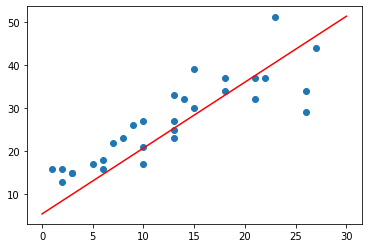

In [78]:
x_line = np.linspace(0, 30, 100)
y_line = w*x_line+b

plt.figure()
plt.scatter(X,Y)
plt.plot(x_line, y_line, 'r')
plt.show()

Let's load the pizza_2_vars.txt into our variables

In [117]:
data2 = np.genfromtxt('data/pizza_2_vars.txt', delimiter = ',', skip_header=1)
print(data2)
X, Y = data2[:, 0:2], data2[:, 2]

[[13. 26. 44.]
 [ 2. 14. 23.]
 [14. 20. 28.]
 [23. 25. 60.]
 [13. 24. 42.]
 [ 1. 12.  5.]
 [18. 23. 51.]
 [10. 18. 44.]
 [26. 24. 42.]
 [ 3. 14.  9.]
 [ 3. 12. 14.]
 [21. 27. 43.]
 [ 7. 17. 22.]
 [22. 21. 34.]
 [ 2. 12. 16.]
 [27. 26. 46.]
 [ 6. 15. 26.]
 [10. 21. 33.]
 [18. 18. 29.]
 [15. 26. 43.]
 [ 9. 20. 37.]
 [26. 25. 62.]
 [ 8. 21. 47.]
 [15. 22. 38.]
 [10. 20. 22.]
 [21. 21. 29.]
 [ 5. 12. 34.]
 [ 6. 14. 38.]
 [13. 19. 30.]
 [13. 20. 28.]]


In [116]:
X

array([[13., 26.],
       [ 2., 14.],
       [14., 20.],
       [23., 25.],
       [13., 24.],
       [ 1., 12.],
       [18., 23.],
       [10., 18.],
       [26., 24.],
       [ 3., 14.],
       [ 3., 12.],
       [21., 27.],
       [ 7., 17.],
       [22., 21.],
       [ 2., 12.],
       [27., 26.],
       [ 6., 15.],
       [10., 21.],
       [18., 18.],
       [15., 26.],
       [ 9., 20.],
       [26., 25.],
       [ 8., 21.],
       [15., 22.],
       [10., 20.],
       [21., 21.],
       [ 5., 12.],
       [ 6., 14.],
       [13., 19.],
       [13., 20.]])

In [89]:
Y = Y.reshape(-1,1)

If we add a second input variable (in our case, the temperature), then the examples aren’t laying on a plane anymore—they’re points in three-dimensional  space. To approximate them, we can use the equivalent of a line, with one more dimension—a plane

Like we did for the line, we can calculate $\hat{y}$ by using the equation of a plane. That’s similar to the equation of a line—but it has two input variables, $x1$ and $x2$, and two weights, $w1$ and $w2$:

 $\hat{y}=x1*w1+x2*w2+b$

Let's explore how it looks like in the next graph:

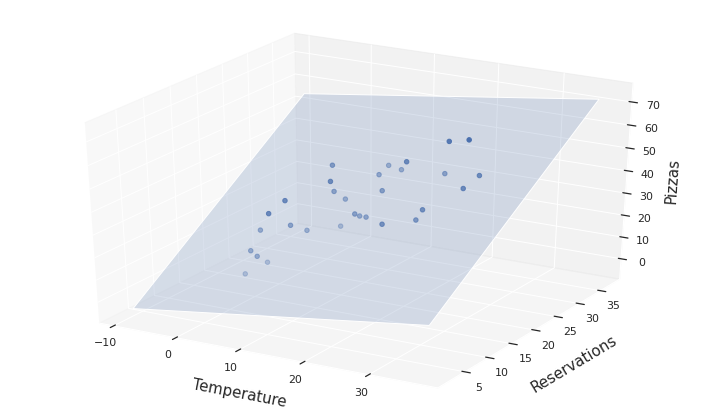

In [83]:
x1 = X[:,0]
x2 = X[:,1]

# These weights came out of the training phase
w = np.array([-3.98230894, 0.37333539, 1.69202346])

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure(figsize=(10,6)).gca(projection="3d")
ax.set_xlabel("Temperature", labelpad=15, fontsize=15)
ax.set_ylabel("Reservations", labelpad=15, fontsize=15)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=15)

# Plot the data points
ax.scatter(x1, x2, Y, color='b')

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
xs, ys = np.meshgrid(edges_x, edges_y)
zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.tight_layout()
plt.show()


In Roberto’s dataset, $x1$ is the number of reservations and
$x2$ is the temperature. It makes sense that the reservations and the temperature have different impacts on the number of pizzas, so they must have different weights.

In the equation of a line, the bias $b$ shifts the line away from the origin. The same goes for a plane: if we didn’t have $b$, then the plane would be constrained to pass by the origin of the axes.


Now see what happens when Roberto adds yet another column to his dataset:

In the book, the author explains with more detail what are matrix multiplications and some other topics. If you are struggling understanding those topics, you can check Chapter 4 of the book, or some resources on the internet. I will skip this part.

Let's start working only with weights (we will talk about the bias after this)
Now let's update some functions

* `predict` function
* `loss` function
* `gradient` function
* `train` function

In [84]:
def predict(X, w):
  return np.matmul(X,w)

In [85]:
def loss(X, Y, w):
  return np.mean((predict(X,w)-Y)**2)

You can check this [link](https://nusco.medium.com/of-gradients-and-matrices-1b19de65e5cd) for more details about the new gradient function

In [86]:
def gradient(X, Y, w):
  return 2 * np.matmul(X.T, (predict(X, w)-Y)) / X.shape[0]

In [107]:
def train(X, Y, iterations, lr):
  w = np.zeros((X.shape[1], 1))
  for i in range(iterations):
    print(f'Iteration {i} => Loss (MSE): {loss(X, Y, w):.10f}')
    w -= gradient(X,Y,w) * lr
  return w

In [108]:
(X.shape[1] + 1)

3

In [111]:
w = train(X, Y, iterations=1000, lr=0.001)

Iteration 0 => Loss (MSE): 1333.5666666667
Iteration 1 => Loss (MSE): 133.0534539507
Iteration 2 => Loss (MSE): 77.8570272057
Iteration 3 => Loss (MSE): 75.0959056317
Iteration 4 => Loss (MSE): 74.7522818324
Iteration 5 => Loss (MSE): 74.5357189397
Iteration 6 => Loss (MSE): 74.3401523830
Iteration 7 => Loss (MSE): 74.1595804946
Iteration 8 => Loss (MSE): 73.9926677878
Iteration 9 => Loss (MSE): 73.8383725142
Iteration 10 => Loss (MSE): 73.6957404944
Iteration 11 => Loss (MSE): 73.5638900797
Iteration 12 => Loss (MSE): 73.4420062838
Iteration 13 => Loss (MSE): 73.3293357266
Iteration 14 => Loss (MSE): 73.2251819761
Iteration 15 => Loss (MSE): 73.1289012439
Iteration 16 => Loss (MSE): 73.0398984059
Iteration 17 => Loss (MSE): 72.9576233234
Iteration 18 => Loss (MSE): 72.8815674431
Iteration 19 => Loss (MSE): 72.8112606533
Iteration 20 => Loss (MSE): 72.7462683782
Iteration 21 => Loss (MSE): 72.6861888919
Iteration 22 => Loss (MSE): 72.6306508349
Iteration 23 => Loss (MSE): 72.5793109191

Let's add a precision parameter

In [94]:
w

array([[0.47655223],
       [1.42962165]])

## Dealing with the bias

So far, we implemented this prediction formula:
* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3$

Now we want to add the bias back to the system, like this:
* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3 + b$

We could rush to the code and add the bias everywhere, like we had done before —but hold on a minute. I can teach you a trick to roll the
bias into the code more smoothly.

Give another look at the previous formula. What’s the difference between the
bias and the weights? The only difference is this: 
* The weights are multiplied by some input variable $x$, and the bias is not.

Now imagine that there is one more input variable in the system (let’s call it x0) that always has a value of 1. We can rewrite the formula like this:

* $\hat{y} = x1 * w1 + x2 * w2 + x3 * w3 + x0 * b$

Now there’s no difference at all between bias and weights. The bias is just
the weight of an input variable that happens to have the constant value 1.

So we can add a dummy input variable with the constant value 1, and we won’t need an explicit bias anymore.

Let's do this

In [113]:
X = np.column_stack((np.ones(X.shape[0]), X))
X.shape

(30, 3)

In [114]:
X

array([[ 1., 13., 26.],
       [ 1.,  2., 14.],
       [ 1., 14., 20.],
       [ 1., 23., 25.],
       [ 1., 13., 24.],
       [ 1.,  1., 12.],
       [ 1., 18., 23.],
       [ 1., 10., 18.],
       [ 1., 26., 24.],
       [ 1.,  3., 14.],
       [ 1.,  3., 12.],
       [ 1., 21., 27.],
       [ 1.,  7., 17.],
       [ 1., 22., 21.],
       [ 1.,  2., 12.],
       [ 1., 27., 26.],
       [ 1.,  6., 15.],
       [ 1., 10., 21.],
       [ 1., 18., 18.],
       [ 1., 15., 26.],
       [ 1.,  9., 20.],
       [ 1., 26., 25.],
       [ 1.,  8., 21.],
       [ 1., 15., 22.],
       [ 1., 10., 20.],
       [ 1., 21., 21.],
       [ 1.,  5., 12.],
       [ 1.,  6., 14.],
       [ 1., 13., 19.],
       [ 1., 13., 20.]])

Which value is the bias?

## Summary

* The second part of the notebook was all about multiple linear regression. 

* We extended our program to datasets with more than one input variable—using multiple weights to match the input variables. 

* We also got rid of the explicit bias, turning it into just another weight. 

* Our learning program is now powerful enough to tackle real-world problems, although it doesn’t look any more complicated than it did before.

**Congratulations, you programmed a functional linear regression algorithm!!**